In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from hyperopt import hp, tpe
from hyperopt.fmin import fmin

In [3]:
import lightgbm
import xgboost

/home/users/lysogy36/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
print("LightGBM version",lightgbm.__version__)

LightGBM version 2.0.10


My version of LightGBM is 2.0.10. I found that results of LightGBM could slightly differs for different versions

In [5]:
print("XGBoost version:",xgboost.__version__)

XGBoost version: 0.6


In [6]:
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [7]:
from helper_repr import *

In [8]:
X_moments_atomic_train = pd.read_csv("X_moments_atomic_train.csv")

In [9]:
X_moments_atomic_test = pd.read_csv("X_moments_atomic_test.csv")

In [10]:
X_moments_atomic_train.columns=X_moments_atomic_train.columns+"_gen2"

In [11]:
X_moments_atomic_test.columns=X_moments_atomic_test.columns+"_gen2"

In [12]:
X_structmap_train=pd.read_csv("X_structmap_train_short.csv")

In [13]:
X_structmap_test=pd.read_csv("X_structmap_test_short.csv")

In [14]:
X_structmap_train.shape

(2400, 1600)

In [15]:
X_structmap_test.shape

(600, 1600)

In [16]:
X_total_train=pd.concat((X_train,X_structmap_train,X_moments_atomic_train),axis=1)

In [17]:
X_total_test=pd.concat((X_test,X_structmap_test,X_moments_atomic_test),axis=1)

In [18]:
X_total_train.shape

(2400, 6951)

In [19]:
X_total_test.shape

(600, 6951)

In [20]:
xgb=XGBRegressor(seed=16)

In [21]:
lgb = LGBMRegressor(random_state=16,n_estimators=100)

# Formation energy

using xgb as feature importance source

In [21]:
bxgb = XGBRegressor(seed=16,n_estimators=25)

In [22]:
bxgb.fit(X_total_train,y_train_1)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=25, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=16, silent=True, subsample=1)

In [23]:
bst=bxgb.booster()

In [24]:
fi_2_df=pd.DataFrame({k:[v] for k,v in bst.get_fscore().items()}).T.reset_index()

In [25]:
fi_2_df.columns=["feature","imp"]

In [ ]:
fi_2_df=fi_2_df.sort_values("imp",ascending=False)

In [38]:
features=[]
scores=[]
for n_estimators in range(30,250,1):
    print("N-estimator = ",n_estimators)
    bxgb = XGBRegressor(seed=16,n_estimators=n_estimators)
    bxgb.fit(X_total_train,y_train_1)
    bst=bxgb.booster()
    fi_2_df=pd.DataFrame({k:[v] for k,v in bst.get_fscore().items()}).T.reset_index()
    fi_2_df.columns=["feature","imp"]
    fi_2_df=fi_2_df.sort_values("imp",ascending=False)
    imp_features=fi_2_df[fi_2_df.imp>1e-7].feature.tolist()
    print("Num of features:",len(imp_features))
    sc=score_regressor1(xgb,X_total_train[imp_features])
    features.append(imp_features)
    scores.append(sc)

N-estimator =  30
Num of features: 89
-0.025121001229977048 +/- 0.0028172456178732334
N-estimator =  31
Num of features: 91
-0.025091208264553362 +/- 0.002823292292203044
N-estimator =  32
Num of features: 96
-0.02482434551210511 +/- 0.002814318122814573
N-estimator =  33
Num of features: 100
-0.024737829675903735 +/- 0.0028089749391353954
N-estimator =  34
Num of features: 103
-0.02473027703327919 +/- 0.0026648820605930813
N-estimator =  35
Num of features: 109
-0.024650577305285293 +/- 0.0027112430009637364
N-estimator =  36
Num of features: 114
-0.024691440753324224 +/- 0.002636786620415942
N-estimator =  37
Num of features: 116
-0.02470378633360806 +/- 0.0027079333598887937
N-estimator =  38
Num of features: 118
-0.024543808453432448 +/- 0.002699660339127354
N-estimator =  39
Num of features: 122
-0.024565894059041686 +/- 0.0026755327333869016
N-estimator =  40
Num of features: 124
-0.024417708517562024 +/- 0.0026498486771864534
N-estimator =  41
Num of features: 130
-0.02457716046

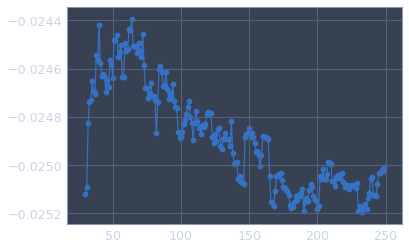

In [40]:
plt.plot(range(30,250,1),scores)
plt.scatter(range(30,250,1),scores)

In [42]:
max(scores)

-0.024395976965445952

In [52]:
best_features_1 = features[np.argmax(scores)]
best_features_1

['In_nn_dist_count',
 'In_nn_centrosym_mean',
 'In_nn_dist_mean',
 'percent_atom_ga',
 'percent_atom_in',
 'Ga_nn_dist_mean',
 'lattice_vector_3_ang',
 'percent_atom_al',
 'Al_nn_centrosym_mean',
 'lattice_angle_alpha_degree',
 'O_6_bn_sp_1_std_gen2',
 'O_1_period_diff_mean_mean_gen2',
 'Al_nn_dist_mean',
 'spacegroup',
 'Al_nn_dist_count',
 'In_3_mu_sp_orig_5_mean_gen2',
 'lattice_angle_beta_degree',
 'In_2_mu_sp_orig_9_std_gen2',
 'O_6_bn_sp_3_std_gen2',
 'min_ox_dist',
 'Ga_nn_dist_count',
 'In_3_vdw_radius_ave_mean_std_gen2',
 'Al_4_an_sp_1_std',
 'Ga_5_bn_sp_6_std_gen2',
 'Ga_2_atomic_volume_diff_mean_mean_gen2',
 'In_nn_dist_std',
 'volume_per_atom',
 'O_6_atomic_volume_diff_mean_std_gen2',
 'In_2_percent_atom_al_mean_gen2',
 'lattice_vector_1_ang',
 'Ga_nn_dist_std',
 'Al_0_mu_sp_orig_4_mean_gen2',
 'std_ox_dist',
 'In_0_an_sp_1_std_gen2',
 'In_2_an_sp_4_std',
 'Ga_1_bn_sp_5_std',
 'Ga_3_an_sp_1_std_gen2',
 'Ga_2_an_sp_4_std',
 'O_0_mu_d_7_std',
 'Ga_2_mu_sp_8_mean',
 'In_3_mu_d

In [22]:
best_features_1=['In_nn_dist_count',
 'In_nn_centrosym_mean',
 'In_nn_dist_mean',
 'percent_atom_ga',
 'percent_atom_in',
 'Ga_nn_dist_mean',
 'lattice_vector_3_ang',
 'percent_atom_al',
 'Al_nn_centrosym_mean',
 'lattice_angle_alpha_degree',
 'O_6_bn_sp_1_std_gen2',
 'O_1_period_diff_mean_mean_gen2',
 'Al_nn_dist_mean',
 'spacegroup',
 'Al_nn_dist_count',
 'In_3_mu_sp_orig_5_mean_gen2',
 'lattice_angle_beta_degree',
 'In_2_mu_sp_orig_9_std_gen2',
 'O_6_bn_sp_3_std_gen2',
 'min_ox_dist',
 'Ga_nn_dist_count',
 'In_3_vdw_radius_ave_mean_std_gen2',
 'Al_4_an_sp_1_std',
 'Ga_5_bn_sp_6_std_gen2',
 'Ga_2_atomic_volume_diff_mean_mean_gen2',
 'In_nn_dist_std',
 'volume_per_atom',
 'O_6_atomic_volume_diff_mean_std_gen2',
 'In_2_percent_atom_al_mean_gen2',
 'lattice_vector_1_ang',
 'Ga_nn_dist_std',
 'Al_0_mu_sp_orig_4_mean_gen2',
 'std_ox_dist',
 'In_0_an_sp_1_std_gen2',
 'In_2_an_sp_4_std',
 'Ga_1_bn_sp_5_std',
 'Ga_3_an_sp_1_std_gen2',
 'Ga_2_an_sp_4_std',
 'O_0_mu_d_7_std',
 'Ga_2_mu_sp_8_mean',
 'In_3_mu_d_1_std',
 'In_5_atomic_radius_rahm_diff_mean_std_gen2',
 'Ga_3_bn_sp_4_mean',
 'Ga_3_lattice_angle_beta_degree_std_gen2',
 'Ga_3_period_diff_std_mean_gen2',
 'In_4_an_d_4_std',
 'Ga_4_lattice_vector_2_ang_std_gen2',
 'Ga_4_period_ave_mean_mean_gen2',
 'Ga_5_electronegativity_diff_std_std_gen2',
 'Ga_0_period_diff_mean_std_gen2',
 'In_3_IP_ave_std_mean_gen2',
 'In_3_IP_ave_mean_std_gen2',
 'Ga_6_number_of_total_atoms_std_gen2',
 'Ga_6_rs_max_diff_mean_std_gen2',
 'In_1_mu_sp_orig_9_mean_gen2',
 'In_1_rs_max_ave_mean_mean_gen2',
 'Ga_1_HOMO_ave_mean_mean_gen2',
 'Ga_1_bn_sp_2_mean_gen2',
 'O_6_bn_sp_6_std_gen2',
 'O_2_rp_max_diff_mean_mean_gen2',
 'O_4_mu_sp_4_std',
 'O_3_mu_d_9_std',
 'Al_5_heat_of_formation_diff_mean_mean_gen2',
 'Al_6_covalent_radius_diff_mean_mean_gen2',
 'O_3_LUMO_diff_std_std_gen2',
 'Al_2_mu_sp_3_mean',
 'Al_1_vdw_radius_diff_std_std_gen2',
 'Al_1_percent_atom_ga_std_gen2',
 'Al_3_mu_sp_1_std',
 'Al_0_bn_d_2_mean',
 'O_2_an_sp_4_std',
 'O_2_bn_d_1_std',
 'Al_0_an_sp_5_mean',
 'In_3_rs_max_ave_mean_mean_gen2',
 'In_3_rp_max_diff_std_mean_gen2',
 'In_3_rp_max_diff_mean_std_gen2',
 'volume',
 'O_5_dipole_polarizability_diff_std_std_gen2',
 'In_2_covalent_radius_diff_mean_mean_gen2',
 'O_6_HOMO_diff_std_std_gen2',
 'In_3_mu_d_3_std',
 'O_6_LUMO_ave_std_mean_gen2',
 'O_6_an_sp_1_mean_gen2',
 'number_of_total_atoms',
 'In_3_atomic_volume_ave_std_std_gen2',
 'O_6_an_sp_4_std_gen2',
 'In_2_mu_d_5_mean',
 'O_6_bn_sp_1_mean_gen2',
 'In_2_mu_d_7_std',
 'In_3_rs_max_ave_std_std_gen2',
 'In_2_mu_sp_orig_11_std_gen2',
 'In_2_mu_sp_2_std',
 'ave_oxide_oxide_band_gap',
 'lattice_angle_gamma_degree',
 'O_0_mu_sp_orig_7_std_gen2',
 'O_4_period_ave_mean_std_gen2',
 'In_3_rs_max_diff_std_mean_gen2',
 'O_5_dipole_polarizability_ave_mean_std_gen2',
 'O_0_mu_sp_orig_2_std_gen2',
 'O_1_mu_d_11_std',
 'O_1_mu_d_1_std',
 'O_0_heat_of_formation_diff_mean_std_gen2',
 'O_0_electronegativity_ave_std_std_gen2',
 'O_0_atomic_volume_diff_std_mean_gen2',
 'O_2_electron_affinity_diff_std_mean_gen2',
 'O_2_rp_max_diff_mean_std_gen2',
 'O_2_vdw_radius_diff_mean_std_gen2',
 'O_2_volume_sp_std',
 'In_6_rp_max_ave_mean_std_gen2',
 'In_6_rd_max_diff_std_std_gen2',
 'In_6_covalent_radius_diff_mean_std_gen2',
 'In_6_atomic_radius_rahm_ave_mean_std_gen2',
 'In_5_heat_of_formation_diff_mean_mean_gen2',
 'In_5_heat_of_formation_ave_std_std_gen2',
 'In_5_electronegativity_diff_mean_std_gen2',
 'In_5_electronegativity_ave_mean_std_gen2',
 'In_5_electron_affinity_ave_std_std_gen2',
 'O_3_bn_sp_3_std',
 'O_3_heat_of_formation_ave_std_mean_gen2',
 'In_5_atomic_radius_rahm_ave_mean_std_gen2',
 'In_4_bn_d_1_std',
 'O_1_lattice_angle_alpha_degree_mean_gen2',
 'In_4_LUMO_diff_mean_std_gen2',
 'In_2_bn_sp_6_std',
 'Al_0_EA_ave_std_std_gen2',
 'In_1_volume_sp_std_gen2',
 'Al_6_covalent_radius_diff_std_mean_gen2',
 'Al_3_bn_d_2_std',
 'Al_3_bn_sp_3_mean',
 'Al_3_mu_sp_7_std',
 'Al_4_bn_sp_1_std',
 'Al_4_electron_affinity_ave_mean_std_gen2',
 'Al_5_atomic_radius_rahm_diff_mean_std_gen2',
 'Al_5_number_of_total_atoms_mean_gen2',
 'Al_6_atomic_radius_rahm_diff_mean_std_gen2',
 'Al_6_heat_of_formation_diff_std_mean_gen2',
 'Al_2_volume_sp_std',
 'Al_6_lattice_angle_gamma_degree_mean_gen2',
 'Al_6_mass_diff_mean_mean_gen2',
 'Al_6_percent_atom_in_std_gen2',
 'Al_6_period_ave_mean_mean_gen2',
 'Al_6_rs_max_ave_mean_mean_gen2',
 'Al_nn_centrosym_std',
 'Ga_0_an_sp_2_mean_gen2',
 'Ga_0_electronegativity_diff_std_std_gen2',
 'Al_3_an_d_5_mean',
 'Al_2_mu_sp_orig_8_std_gen2',
 'Ga_0_mu_sp_orig_6_mean_gen2',
 'Al_1_IP_ave_mean_mean_gen2',
 'Al_0_LUMO_diff_std_mean_gen2',
 'Al_0_bn_sp_1_mean_gen2',
 'Al_0_bn_sp_3_mean',
 'Al_0_mu_sp_5_std',
 'Al_0_mu_sp_7_mean',
 'Al_0_mu_sp_orig_2_mean_gen2',
 'Al_0_mu_sp_orig_5_mean_gen2',
 'Al_0_rs_max_ave_std_std_gen2',
 'Al_1_LUMO_ave_mean_std_gen2',
 'Al_2_mu_sp_orig_4_std_gen2',
 'Al_1_bn_sp_5_std',
 'Al_1_covalent_radius_diff_std_std_gen2',
 'Al_1_electron_affinity_diff_mean_mean_gen2',
 'Al_1_vdw_radius_ave_mean_mean_gen2',
 'Al_2_bn_sp_5_mean',
 'Al_2_bn_sp_5_mean_gen2',
 'Al_2_lattice_angle_beta_degree_mean_gen2',
 'Al_2_mu_sp_5_std',
 'Ga_0_mu_sp_5_std',
 'Ga_0_vdw_radius_ave_mean_std_gen2',
 'In_1_rp_max_ave_mean_mean_gen2',
 'Ga_5_lattice_angle_beta_degree_std_gen2',
 'Ga_4_mu_sp_1_std',
 'Ga_4_rd_max_ave_std_mean_gen2',
 'Ga_5_IP_diff_mean_mean_gen2',
 'Ga_5_atomic_radius_rahm_diff_std_std_gen2',
 'Ga_5_bn_sp_2_std_gen2',
 'Ga_5_bn_sp_3_mean_gen2',
 'Ga_5_bn_sp_6_mean_gen2',
 'Ga_5_electronegativity_ave_std_mean_gen2',
 'Ga_5_lattice_angle_gamma_degree_std_gen2',
 'Ga_4_LUMO_ave_mean_std_gen2',
 'Al_0_HOMO_ave_std_std_gen2',
 'Ga_5_period_diff_std_mean_gen2',
 'Ga_5_rp_max_diff_mean_mean_gen2',
 'Ga_6_mu_sp_orig_3_mean_gen2',
 'Ga_6_mu_sp_orig_3_std_gen2',
 'In_0_lattice_vector_3_ang_std_gen2',
 'In_0_vdw_radius_diff_std_std_gen2',
 'In_1_mu_sp_orig_1_mean_gen2',
 'Ga_4_mu_d_4_mean',
 'Ga_3_rp_max_diff_mean_mean_gen2',
 'Ga_1_atomic_radius_rahm_ave_mean_mean_gen2',
 'Ga_2_atomic_volume_diff_std_std_gen2',
 'Ga_1_atomic_volume_diff_mean_std_gen2',
 'Ga_1_dipole_polarizability_ave_mean_mean_gen2',
 'Ga_1_dipole_polarizability_ave_std_std_gen2',
 'Ga_1_lattice_vector_2_ang_std_gen2',
 'Ga_1_period_diff_mean_std_gen2',
 'Ga_2_IP_diff_std_mean_gen2',
 'Ga_2_an_sp_1_mean_gen2',
 'Ga_2_an_sp_4_std_gen2',
 'Ga_2_bn_d_1_std',
 'Ga_3_mu_sp_orig_11_mean_gen2',
 'Ga_2_bn_sp_4_mean_gen2',
 'Ga_2_mass_diff_std_mean_gen2',
 'Ga_2_mu_d_7_mean',
 'Ga_2_mu_d_9_std',
 'Ga_2_mu_sp_orig_2_std_gen2',
 'Ga_2_rd_max_ave_mean_std_gen2',
 'Ga_3_an_sp_1_mean_gen2',
 'Ga_3_bn_sp_3_std',
 'Ga_5_mu_sp_orig_1_std_gen2']

## hyperoptimization of LightGBM on best features

In [210]:
def objective_lgb(params):
    params = {"num_leaves":int(params["num_leaves"]),
              "n_estimators":int(params["n_estimators"]),
             "colsample_bytree":params["colsample_bytree"],
              "learning_rate":params["learning_rate"],
              "subsample":params["subsample"],              
             "min_child_weight":int(params["min_child_weight"])}
    print(params)
    reg=LGBMRegressor(n_jobs=-1,**params,random_state=16)
    sc = score_regressor1(reg,X_total_train[best_features_1])
    return -sc

In [213]:
space = {
    'num_leaves':hp.quniform('num_leaves',80,100,2),
    'colsample_bytree':hp.uniform('colsample_bytree',0.3,1.0),
    'subsample':hp.uniform('subsample',0.3,1.0),
    'min_child_weight':hp.quniform('min_child_weight',5,11,1),
    'n_estimators':hp.quniform('n_estimators',25,250,5),
    'learning_rate':hp.uniform('learning_rage',0.05,0.1),
}

In [214]:
best = fmin(fn=objective_lgb,space=space,algo=tpe.suggest, max_evals=250)

{'learning_rate': 0.08079655320431267, 'min_child_weight': 6, 'num_leaves': 92, 'subsample': 0.7424219930124867, 'colsample_bytree': 0.8756621816509633, 'n_estimators': 185}
-0.023127740362733032 +/- 0.0030458804623371225
{'learning_rate': 0.06815128827809247, 'min_child_weight': 11, 'num_leaves': 96, 'subsample': 0.9232749580189006, 'colsample_bytree': 0.9340328740066228, 'n_estimators': 125}
-0.02327696938745986 +/- 0.00327817575117796
{'learning_rate': 0.06891766167379712, 'min_child_weight': 7, 'num_leaves': 94, 'subsample': 0.8214609314835963, 'colsample_bytree': 0.5649396281985897, 'n_estimators': 35}
-0.024268217932359133 +/- 0.0037646324352098664
{'learning_rate': 0.057183219999745766, 'min_child_weight': 6, 'num_leaves': 84, 'subsample': 0.8990497931218411, 'colsample_bytree': 0.5179583720190428, 'n_estimators': 155}
-0.022048563836463263 +/- 0.003346177079492196
{'learning_rate': 0.07025730336812601, 'min_child_weight': 9, 'num_leaves': 82, 'subsample': 0.8953644366531173, 'c

In [23]:
best_lgb_1 = {
    'learning_rate': 0.050031583067449585,
    'min_child_weight': 9,
    'num_leaves': 80,
    'subsample': 0.607446055921953,
    'colsample_bytree': 0.36379689679683647,
    'n_estimators': 165
}

best score on CV

In [250]:
reg=LGBMRegressor(n_jobs=-1,**best_lgb_1,random_state=16)
score_regressor1(reg,X_total_train[best_features_1])

-0.021587867305871297 +/- 0.003537198658473575


-0.021587867305871297

# Band gap

baseline score

In [43]:
score_regressor2(xgb,X_total_train)

-0.0799954647391907 +/- 0.009535798659249032


-0.0799954647391907

feature selection is based on feature importance

In [44]:
features2=[]
scores2=[]
for n_estimators in range(30,250,1):
    print("N-estimator = ",n_estimators)
    bxgb = XGBRegressor(seed=16,n_estimators=n_estimators)
    bxgb.fit(X_total_train,y_train_2)
    bst=bxgb.booster()
    fi_2_df=pd.DataFrame({k:[v] for k,v in bst.get_fscore().items()}).T.reset_index()
    fi_2_df.columns=["feature","imp"]
    fi_2_df=fi_2_df.sort_values("imp",ascending=False)
    imp_features=fi_2_df[fi_2_df.imp>1e-7].feature.tolist()
    print("Num of features:",len(imp_features))
    sc=score_regressor2(xgb,X_total_train[imp_features])
    features2.append(imp_features)
    scores2.append(sc)

N-estimator =  30
Num of features: 64
-0.07822796538068508 +/- 0.009606816063170626
N-estimator =  31
Num of features: 68
-0.0783634729346074 +/- 0.009523218802924071
N-estimator =  32
Num of features: 73
-0.0780862378178622 +/- 0.009701945170640835
N-estimator =  33
Num of features: 77
-0.07819116532382207 +/- 0.009671738938406555
N-estimator =  34
Num of features: 78
-0.07772219878190523 +/- 0.009750295016210607
N-estimator =  35
Num of features: 84
-0.07729888959872752 +/- 0.00922385946428304
N-estimator =  36
Num of features: 86
-0.0774057807839755 +/- 0.009115774420909233
N-estimator =  37
Num of features: 89
-0.07701006535434007 +/- 0.009627986003857699
N-estimator =  38
Num of features: 93
-0.07697719663454744 +/- 0.009250603135472572
N-estimator =  39
Num of features: 95
-0.07699945052703104 +/- 0.009418098374399603
N-estimator =  40
Num of features: 98
-0.07663806322652081 +/- 0.009463249053591432
N-estimator =  41
Num of features: 100
-0.07683203755712428 +/- 0.00938089363241

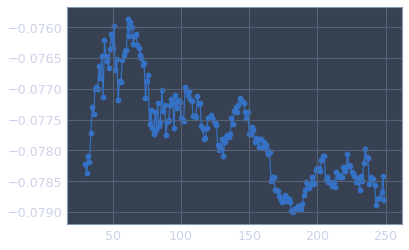

In [45]:
plt.plot(range(30,250,1),scores2)
plt.scatter(range(30,250,1),scores2)

In [47]:
max(scores2)

-0.07587391268288592

In [46]:
imp_features2 = features2[np.argmax(scores2)]
imp_features2

['volume_per_atom',
 'ave_oxide_oxide_formation_energy',
 'lattice_vector_3_ang',
 'In_nn_centrosym_mean',
 'Al_nn_centrosym_mean',
 'In_nn_dist_count',
 'Ga_6_heat_of_formation_diff_mean_std_gen2',
 'percent_atom_al',
 'In_4_an_d_4_std',
 'Al_nn_dist_mean',
 'Al_3_mu_d_8_std',
 'Al_0_period_diff_std_std_gen2',
 'In_2_bn_sp_6_std',
 'Ga_nn_dist_mean',
 'Al_2_mu_sp_orig_1_mean_gen2',
 'O_0_mu_sp_orig_5_std_gen2',
 'In_4_LUMO_diff_mean_std_gen2',
 'mean_ox_dist',
 'lattice_angle_alpha_degree',
 'std_ox_dist',
 'Al_3_volume_d_mean',
 'Ga_4_EA_ave_mean_std_gen2',
 'Ga_3_bn_sp_3_std',
 'In_2_covalent_radius_diff_mean_mean_gen2',
 'lattice_vector_1_ang',
 'Ga_nn_centrosym_mean',
 'Ga_1_mass_ave_std_mean_gen2',
 'Al_3_mu_sp_7_std',
 'In_2_volume_d_std',
 'Al_6_bn_sp_6_std_gen2',
 'O_0_covalent_radius_diff_std_mean_gen2',
 'In_3_LUMO_ave_std_mean_gen2',
 'Ga_3_mu_d_3_std',
 'ave_oxide_oxide_band_gap',
 'Al_6_vdw_radius_diff_mean_std_gen2',
 'Ga_3_vdw_radius_ave_std_std_gen2',
 'Al_1_an_d_2_std

## hyperoptimization of LightGBM

In [25]:
best_features_2=['volume_per_atom',
 'ave_oxide_oxide_formation_energy',
 'lattice_vector_3_ang',
 'In_nn_centrosym_mean',
 'Al_nn_centrosym_mean',
 'In_nn_dist_count',
 'Ga_6_heat_of_formation_diff_mean_std_gen2',
 'percent_atom_al',
 'In_4_an_d_4_std',
 'Al_nn_dist_mean',
 'Al_3_mu_d_8_std',
 'Al_0_period_diff_std_std_gen2',
 'In_2_bn_sp_6_std',
 'Ga_nn_dist_mean',
 'Al_2_mu_sp_orig_1_mean_gen2',
 'O_0_mu_sp_orig_5_std_gen2',
 'In_4_LUMO_diff_mean_std_gen2',
 'mean_ox_dist',
 'lattice_angle_alpha_degree',
 'std_ox_dist',
 'Al_3_volume_d_mean',
 'Ga_4_EA_ave_mean_std_gen2',
 'Ga_3_bn_sp_3_std',
 'In_2_covalent_radius_diff_mean_mean_gen2',
 'lattice_vector_1_ang',
 'Ga_nn_centrosym_mean',
 'Ga_1_mass_ave_std_mean_gen2',
 'Al_3_mu_sp_7_std',
 'In_2_volume_d_std',
 'Al_6_bn_sp_6_std_gen2',
 'O_0_covalent_radius_diff_std_mean_gen2',
 'In_3_LUMO_ave_std_mean_gen2',
 'Ga_3_mu_d_3_std',
 'ave_oxide_oxide_band_gap',
 'Al_6_vdw_radius_diff_mean_std_gen2',
 'Ga_3_vdw_radius_ave_std_std_gen2',
 'Al_1_an_d_2_std',
 'In_6_rp_max_diff_mean_mean_gen2',
 'Ga_0_rs_max_diff_std_std_gen2',
 'Ga_0_mu_sp_5_mean',
 'Ga_0_mu_sp_5_std',
 'Al_5_mu_sp_orig_8_mean_gen2',
 'Al_5_lattice_vector_3_ang_mean_gen2',
 'Al_5_mu_sp_orig_1_mean_gen2',
 'Ga_2_EA_diff_std_std_gen2',
 'O_4_mu_d_2_std',
 'Ga_2_mu_sp_8_mean',
 'In_2_mu_d_5_std',
 'In_0_dipole_polarizability_diff_mean_std_gen2',
 'O_3_covalent_radius_diff_std_std_gen2',
 'Al_1_rp_max_ave_std_mean_gen2',
 'Al_0_an_d_2_mean',
 'Al_4_bn_sp_4_mean',
 'Al_5_mu_sp_orig_10_mean_gen2',
 'Al_4_bn_sp_6_std',
 'O_2_mu_d_5_std',
 'O_1_period_diff_mean_mean_gen2',
 'Al_0_LUMO_diff_std_std_gen2',
 'In_3_mu_d_9_std',
 'In_3_HOMO_ave_std_std_gen2',
 'In_6_heat_of_formation_diff_std_std_gen2',
 'In_3_percent_atom_in_std_gen2',
 'In_3_IP_ave_mean_mean_gen2',
 'In_3_covalent_radius_ave_std_std_gen2',
 'In_2_covalent_radius_ave_mean_std_gen2',
 'In_3_atomic_volume_diff_mean_std_gen2',
 'In_3_an_sp_3_mean',
 'In_3_LUMO_diff_mean_std_gen2',
 'In_2_covalent_radius_diff_mean_std_gen2',
 'In_2_mu_sp_orig_9_std_gen2',
 'In_2_mu_sp_10_mean',
 'In_2_mu_d_4_std',
 'In_3_EA_ave_std_std_gen2',
 'In_nn_dist_mean',
 'In_3_rd_max_ave_std_std_gen2',
 'O_2_IP_diff_std_std_gen2',
 'max_ox_dist',
 'lattice_vector_2_ang',
 'lattice_angle_beta_degree',
 'O_6_an_sp_4_std_gen2',
 'O_4_bn_d_6_mean',
 'O_4_EA_diff_std_mean_gen2',
 'O_3_heat_of_formation_ave_std_mean_gen2',
 'O_3_covalent_radius_ave_std_std_gen2',
 'O_3_bn_sp_5_std_gen2',
 'O_3_an_d_5_mean',
 'O_2_mu_sp_orig_1_std_gen2',
 'O_2_mu_sp_7_mean',
 'O_1_rd_max_ave_std_std_gen2',
 'In_4_heat_of_formation_diff_mean_std_gen2',
 'O_1_mu_d_1_std',
 'O_1_an_sp_5_std_gen2',
 'O_0_mu_d_8_mean',
 'O_0_lattice_angle_gamma_degree_mean_gen2',
 'O_0_electronegativity_ave_std_std_gen2',
 'O_0_bn_sp_6_mean',
 'In_2_an_sp_4_std',
 'In_6_lattice_vector_1_ang_mean_gen2',
 'In_5_electronegativity_diff_mean_std_gen2',
 'In_5_covalent_radius_diff_mean_std_gen2',
 'In_5_atomic_radius_rahm_diff_mean_std_gen2',
 'In_4_mu_sp_orig_8_std_gen2',
 'In_2_bn_sp_4_mean',
 'Al_0_HOMO_ave_std_std_gen2',
 'In_1_rd_max_ave_mean_std_gen2',
 'Al_5_atomic_radius_rahm_ave_std_std_gen2',
 'Al_4_an_d_4_mean',
 'Al_4_an_sp_1_std',
 'Al_4_an_sp_2_std',
 'Al_4_bn_d_4_mean',
 'Al_4_heat_of_formation_ave_mean_mean_gen2',
 'Al_5_IP_diff_mean_std_gen2',
 'Al_5_electron_affinity_diff_std_mean_gen2',
 'Al_3_mu_d_9_mean',
 'Al_5_heat_of_formation_ave_std_std_gen2',
 'Al_5_mass_diff_std_mean_gen2',
 'Al_5_mu_sp_orig_2_std_gen2',
 'Al_5_rs_max_ave_mean_mean_gen2',
 'Al_5_rs_max_diff_std_std_gen2',
 'Al_6_HOMO_diff_mean_std_gen2',
 'Al_3_mu_sp_4_mean',
 'Al_3_bn_sp_3_std',
 'In_1_rd_max_ave_mean_mean_gen2',
 'Al_1_mu_d_1_std',
 'Al_0_lattice_angle_beta_degree_std_gen2',
 'Al_0_lattice_vector_1_ang_std_gen2',
 'Al_0_mass_diff_std_std_gen2',
 'Al_0_rs_max_ave_mean_std_gen2',
 'Al_1_dipole_polarizability_ave_mean_mean_gen2',
 'Al_1_dipole_polarizability_diff_std_std_gen2',
 'Al_1_mu_sp_orig_6_mean_gen2',
 'Al_3_bn_sp_3_mean',
 'Al_2_bn_d_1_std',
 'Al_2_bn_sp_3_std',
 'Al_2_rd_max_diff_mean_std_gen2',
 'Al_3_an_d_5_mean',
 'Al_3_an_sp_1_mean',
 'Al_3_bn_d_4_std',
 'Al_6_an_sp_1_mean_gen2',
 'Al_6_electron_affinity_diff_mean_std_gen2',
 'Al_6_lattice_vector_3_ang_std_gen2',
 'Ga_5_rp_max_diff_mean_std_gen2',
 'Ga_4_volume_sp_std_gen2',
 'Ga_5_HOMO_ave_mean_std_gen2',
 'Ga_5_an_sp_1_mean_gen2',
 'Ga_5_bn_sp_3_std_gen2',
 'Ga_5_mu_sp_orig_8_std_gen2',
 'Ga_5_percent_atom_in_mean_gen2',
 'Ga_6_lattice_vector_1_ang_mean_gen2',
 'Al_6_period_diff_std_mean_gen2',
 'In_0_mu_sp_5_std',
 'In_0_mu_sp_orig_5_std_gen2',
 'In_0_period_ave_std_mean_gen2',
 'In_0_rd_max_ave_std_std_gen2',
 'In_0_rs_max_diff_std_std_gen2',
 'In_1_mu_sp_orig_9_std_gen2',
 'Ga_4_rd_max_ave_std_std_gen2',
 'Ga_4_lattice_vector_3_ang_std_gen2',
 'Ga_4_covalent_radius_ave_std_std_gen2',
 'Ga_4_an_d_4_std',
 'Ga_3_mu_sp_8_std',
 'Ga_3_atomic_volume_ave_std_std_gen2',
 'Ga_3_an_sp_1_mean_gen2',
 'Ga_2_dipole_polarizability_diff_std_std_gen2',
 'Ga_1_rd_max_diff_mean_std_gen2',
 'Ga_1_percent_atom_in_mean_gen2',
 'Ga_1_mu_sp_5_std',
 'Ga_1_an_sp_5_mean',
 'Ga_0_percent_atom_in_std_gen2',
 'Ga_0_mu_sp_orig_2_mean_gen2',
 'Ga_0_covalent_radius_diff_std_std_gen2',
 'Al_nn_dist_std',
 'Al_6_vdw_radius_ave_mean_std_gen2',
 'Ga_5_electron_affinity_diff_std_mean_gen2']

In [221]:
def objective_lgb(params):
    params = {"num_leaves":int(params["num_leaves"]),
              "n_estimators":int(params["n_estimators"]),
             "colsample_bytree":params["colsample_bytree"],
              "learning_rate":params["learning_rate"],
              "subsample":params["subsample"],              
             "min_child_weight":int(params["min_child_weight"])}
    print(params)
    reg=LGBMRegressor(n_jobs=-1,**params,random_state=16)
    sc = score_regressor2(reg,X_total_train[best_features_2])
    return -sc

In [222]:
space = {
    'num_leaves':hp.quniform('num_leaves',80,100,2),
    'colsample_bytree':hp.uniform('colsample_bytree',0.3,1.0),
    'subsample':hp.uniform('subsample',0.3,1.0),
    'min_child_weight':hp.quniform('min_child_weight',5,11,1),
    'n_estimators':hp.quniform('n_estimators',25,250,5),
    'learning_rate':hp.uniform('learning_rage',0.05,0.1),
}

hyperoptimization here is time-consuming and random seed was not fixed, it is better to use cached best_params_lgb_2 below

In [223]:
best = fmin(fn=objective_lgb,space=space,algo=tpe.suggest, max_evals=1000)

{'learning_rate': 0.0714766263641763, 'min_child_weight': 11, 'num_leaves': 94, 'subsample': 0.937211857314832, 'colsample_bytree': 0.9793627411986197, 'n_estimators': 75}
-0.07600408453734067 +/- 0.011760310984277706
{'learning_rate': 0.07829578309511781, 'min_child_weight': 7, 'num_leaves': 92, 'subsample': 0.8539736857674234, 'colsample_bytree': 0.9551034718391387, 'n_estimators': 40}
-0.07787623148373433 +/- 0.012329624068262547
{'learning_rate': 0.09155379171942621, 'min_child_weight': 11, 'num_leaves': 80, 'subsample': 0.313880618004097, 'colsample_bytree': 0.8693426780549902, 'n_estimators': 235}
-0.07449482560883573 +/- 0.009098340792870007
{'learning_rate': 0.07683166420339388, 'min_child_weight': 8, 'num_leaves': 82, 'subsample': 0.7391563711886887, 'colsample_bytree': 0.7343777643492887, 'n_estimators': 120}
-0.0744295728466494 +/- 0.011410188325598846
{'learning_rate': 0.08710665270665213, 'min_child_weight': 6, 'num_leaves': 82, 'subsample': 0.5756915605565828, 'colsample_

KeyboardInterrupt: 

cached best params after hyperoptimization

In [26]:
best_params_lgb_2 = {
    'learning_rate': 0.05000743610479569,
    'min_child_weight': 7,
    'num_leaves': 98,
    'subsample': 0.3613801787750081,
    'colsample_bytree': 0.3449012379174325,
    'n_estimators': 205
}

In [27]:
lgb2=LGBMRegressor(n_jobs=-1,**best_params_lgb_2,random_state=16)

Best score on CV

In [253]:
score_regressor2(lgb2,X_total_train[best_features_2])

-0.06944561112474844 +/- 0.009710111630024734


-0.06944561112474844